# Fowl Escapades

This notebook shows a quick example submission to the 'Fowl Escapades' challenge on Zindi. 

It's not necessarily a good submission, but it does take you through the whole process. Loading the data, processing the audio into features (spectrograms, in this case) and making a submission.

I hope it's useful :)

# Load the labels

I'm assuming you've extracted test.zip and train.zip, and downloaded the CSV files from Zindi.

Here we'll generate a couple of dataframes with the labels for train and paths to the images.

In [ ]:
# !ls

In [1]:
import pandas as pd

In [2]:
sub = pd.read_csv('../input/SampleSubmission.csv')
sub.head()

,ID,Ring-necked Dove,Black Cuckoo,Red-chested Cuckoo,Fiery-necked Nightjar,Green Wood Hoopoe,Crested Barbet,Cape Batis,Olive Bushshrike,Orange-breasted Bushshrike,...,Karoo Scrub Robin,White-browed Scrub Robin,Cape Robin-Chat,White-browed Robin-Chat,Chorister Robin-Chat,Southern Double-collared Sunbird,White-bellied Sunbird,African Pipit,African Rock Pipit,Cape Bunting
0,019OYB,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,01S9OX,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,02CS12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,02LM3W,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0C3A2V,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train = pd.read_csv('../input/Train.csv')
train.head()

,ID,common_name
0,MBMG2C,Ring-necked Dove
1,K8LJSB,Ring-necked Dove
2,OGD9L6,Ring-necked Dove
3,581PCQ,Ring-necked Dove
4,P91M1F,Ring-necked Dove


In [4]:
# This list will be useful later
birds = sub.columns[1:]
birds

Index(['Ring-necked Dove', 'Black Cuckoo', 'Red-chested Cuckoo',
       'Fiery-necked Nightjar', 'Green Wood Hoopoe', 'Crested Barbet',
       'Cape Batis', 'Olive Bushshrike', 'Orange-breasted Bushshrike',
       'Bokmakierie', 'Black-backed Puffback', 'Southern Boubou',
       'Black-headed Oriole', 'Fork-tailed Drongo',
       'African Paradise Flycatcher', 'Sabota Lark', 'Eastern Clapper Lark',
       'Rufous-naped Lark', 'Dark-capped Bulbul', 'Sombre Greenbul',
       'Long-billed Crombec', 'African Reed Warbler', 'Rattling Cisticola',
       'Levaillants Cisticola', 'Tawny-flanked Prinia', 'Karoo Prinia',
       'Bar-throated Apalis', 'Green-backed Camaroptera',
       'Chestnut-vented Warbler', 'Cape White-eye', 'Karoo Scrub Robin',
       'White-browed Scrub Robin', 'Cape Robin-Chat',
       'White-browed Robin-Chat', 'Chorister Robin-Chat',
       'Southern Double-collared Sunbird', 'White-bellied Sunbird',
       'African Pipit', 'African Rock Pipit', 'Cape Bunting'],
      d

In [5]:
# Add file names
# train['file_name'] = 'train/'+train['ID']+'.mp3'
# sub['file_name'] = 'test/'+sub['ID']+'.mp3'

train['file_name'] = 'train/'+train['ID']+'.png'
sub['file_name'] = 'test/'+sub['ID']+'.png'

# Generate features

There are many ways to tackle this challenge. Try deep learning on the audio, generate a spectrogram and treat this as an image classification task, use some signal processing tricks to look for close matches, try to extract meaningful features such as dominant frequencies.... It's up to you :)

This blog (https://towardsdatascience.com/extract-features-of-music-75a3f9bc265d) shows how to visualize different properties of the waveform, and some features you could use. 

For this example, I'll generate a square spectrogram and save as an image file - not a very elegant approach but let's see where it gets us.

In [ ]:
# import IPython.display as ipd
# from matplotlib import pyplot as plt
# import librosa

In [ ]:
# #listen to a sound
# pth = train['file_name'].sample(1).values[0]
# ipd.Audio(pth)

In [ ]:
# # Going from a sound to an image: spectrograms

# def gen_spectrogram(path):
#   x , sr = librosa.load(path)
#   X = librosa.stft(x)
#   Xdb = librosa.amplitude_to_db(abs(X)[:,:min(1025, len(X[0]))])
#   fig = plt.figure(frameon=False)
#   fig.set_size_inches(8, 8)
#   ax = plt.Axes(fig, [0., 0., 1., 1.])
#   ax.set_axis_off()
#   fig.add_axes(ax)
#   ax.imshow(Xdb, aspect='auto')
#   fig.savefig(path[:-4]+'.png', dpi=512//8)
#   print(path[:-4]+'.png')

# gen_spectrogram(pth)

In [ ]:
# # This takes a long time to run, and you might have to do it in batches. Save the spectrogras for future runs!
# import numpy as np
# import os
# for i, pth in enumerate(np.concatenate([train['file_name'].values, sub['file_name'].values])):
#   print(i*100//(len(sub)+len(train)), '% done')
#   # Check if we've already generated a spectrogram, and if not, make one
#   if not os.path.isfile(pth[:-4]+'.png'):
#     plt.clf()
#     gen_spectrogram(pth)
#   ipd.clear_output(wait=True)
#   plt.close()
  

In [6]:
# Checking that the spectrograms were generated successfully:
import glob
ims = glob.glob('../train/*.png')
print(len(ims), len(train))

1857 1857


In [7]:
# If you stopped the process early and want to try with only a few spectrograms, this will only use the ones that have been generated
# train['img_path'] = train['file_name'].str[:-4]+'.png'
train['img_path'] = '../train\\' + train['ID']+'.png'
train = train.loc[train.img_path.isin(ims)]
len(train)

1857

In [8]:
# Similarly, test now has rows for files that have had spectrograms created.
sub['img_path'] = '../test\\'+sub['ID']+'.png'
ims = glob.glob('../test/*.png')
test = sub.loc[sub.img_path.isin(ims)]
print(len(sub), len(test))

911 911


# Modelling

I use a model pre-trained on imagenet, and throw the spectrograms at it. Not the most elegant approach, but it will do for now!

In [9]:
from fastai.vision import *

In [10]:
train.head()

,ID,common_name,file_name,img_path
0,MBMG2C,Ring-necked Dove,train/MBMG2C.png,../train\MBMG2C.png
1,K8LJSB,Ring-necked Dove,train/K8LJSB.png,../train\K8LJSB.png
2,OGD9L6,Ring-necked Dove,train/OGD9L6.png,../train\OGD9L6.png
3,581PCQ,Ring-necked Dove,train/581PCQ.png,../train\581PCQ.png
4,P91M1F,Ring-necked Dove,train/P91M1F.png,../train\P91M1F.png


In [11]:
np.random.seed(888)

# tfms = get_transforms()
tfms=[]
data = (ImageList.from_df(train, path='../', cols=2)
      .split_by_rand_pct(.3, seed=888)
      .label_from_df(cols=1)
      .transform(tfms, size=224)
      .databunch(bs=32)
      .normalize(imagenet_stats)
     )

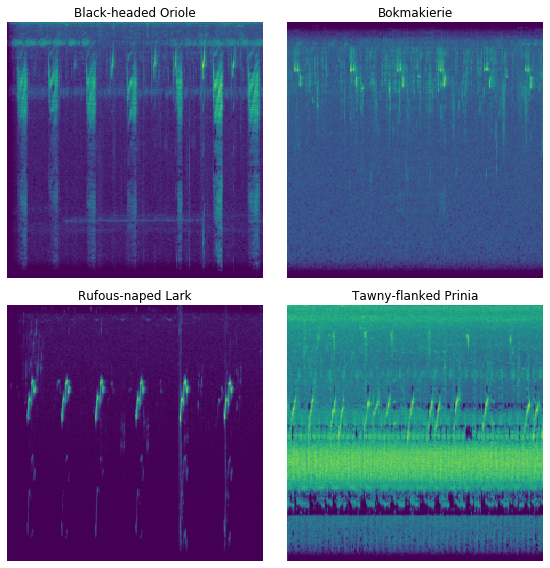

In [12]:
data.show_batch(rows=2)

In [13]:
print(data.classes)

['African Paradise Flycatcher', 'African Pipit', 'African Reed Warbler', 'African Rock Pipit', 'Bar-throated Apalis', 'Black Cuckoo', 'Black-backed Puffback', 'Black-headed Oriole', 'Bokmakierie', 'Cape Batis', 'Cape Bunting', 'Cape Robin-Chat', 'Cape White-eye', 'Chestnut-vented Warbler', 'Chorister Robin-Chat', 'Crested Barbet', 'Dark-capped Bulbul', 'Eastern Clapper Lark', 'Fiery-necked Nightjar', 'Fork-tailed Drongo', 'Green Wood Hoopoe', 'Green-backed Camaroptera', 'Karoo Prinia', 'Karoo Scrub Robin', 'Levaillants Cisticola', 'Long-billed Crombec', 'Olive Bushshrike', 'Orange-breasted Bushshrike', 'Rattling Cisticola', 'Red-chested Cuckoo', 'Ring-necked Dove', 'Rufous-naped Lark', 'Sabota Lark', 'Sombre Greenbul', 'Southern Boubou', 'Southern Double-collared Sunbird', 'Tawny-flanked Prinia', 'White-bellied Sunbird', 'White-browed Robin-Chat', 'White-browed Scrub Robin']


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.29E-06
Min loss divided by 10: 1.91E-03


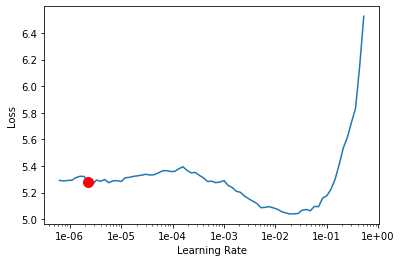

In [14]:
# Create a learner and pick a learning rate
learn = cnn_learner(data, models.densenet161, metrics=[error_rate, accuracy, top_k_accuracy]).to_fp16().mixup()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [15]:
# Train the head of the model
lr = 4e-3
learn.fit_one_cycle(3, lr)

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,4.794903,3.109398,0.820467,0.179533,0.479354,01:10
1,3.819828,2.415232,0.640934,0.359066,0.700180,01:07
2,2.942864,2.174251,0.549372,0.450628,0.723519,01:05


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 7.59E-07
Min loss divided by 10: 3.31E-05


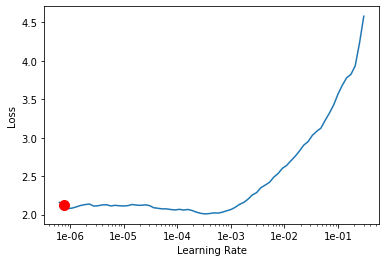

In [16]:
# Not doing very well yet. Let's train the inner layers
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [17]:
learn.fit_one_cycle(30, slice(6e-5, 6e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,2.165809,2.119213,0.538600,0.461400,0.734291,01:13
1,2.008374,2.001594,0.499102,0.500898,0.741472,01:13
2,1.905397,1.923261,0.499102,0.500898,0.773788,01:13
3,1.737534,1.871894,0.475763,0.524237,0.777379,01:13
4,1.621937,1.838991,0.472172,0.527828,0.791741,01:13
5,1.554495,1.911697,0.486535,0.513465,0.793537,01:13
6,1.514856,1.713127,0.450628,0.549372,0.829443,01:13
7,1.518153,1.904085,0.481149,0.518851,0.795332,01:13
8,1.465706,1.636454,0.423698,0.576302,0.834829,01:13
9,1.413891,1.645903,0.425494,0.574506,0.836625,01:13


In [18]:
learn.save('densenet161-model2-mixup-stg1')

### Here we change the size to 512x512 for continued training.
The databunch is created with the same split and the same seed, but the batch size is reduced to 12 to fit in GPU memory on my local environment.


In [20]:
np.random.seed(888)

# tfms = get_transforms()
tfms=[]
data = (ImageList.from_df(train, path='../', cols=2)
      .split_by_rand_pct(.3, seed=888)
      .label_from_df(cols=1)
      .transform(tfms, size=512)
      .databunch(bs=12)
      .normalize(imagenet_stats)
     )

In [21]:
learn = cnn_learner(data, models.densenet161, metrics=[error_rate, accuracy, top_k_accuracy]).to_fp16().mixup()

### Note that the weights from the first round of training are loaded.

In [22]:
learn.load('densenet161-model2-mixup-stg1')

Learner(data=ImageDataBunch;

Train: LabelList (1300 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
Ring-necked Dove,Ring-necked Dove,Ring-necked Dove,Ring-necked Dove,Ring-necked Dove
Path: ..;

Valid: LabelList (557 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
Southern Boubou,Tawny-flanked Prinia,Bar-throated Apalis,Fiery-necked Nightjar,White-browed Scrub Robin
Path: ..;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _Den

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.75E-06
Min loss divided by 10: 1.58E-03


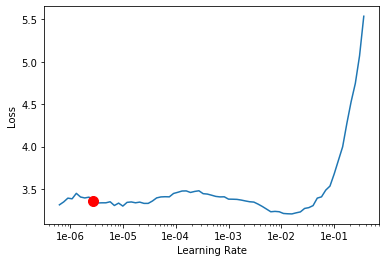

In [23]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [24]:
lr = 3e-3
learn.fit_one_cycle(4, lr)

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,2.617061,2.956989,0.669659,0.330341,0.705566,02:17
1,2.475754,2.030888,0.454219,0.545781,0.813285,02:07
2,2.006165,1.288556,0.326750,0.673250,0.879713,02:06
3,1.525959,1.196713,0.305206,0.694794,0.892280,02:07


In [25]:
learn.save('densenet161-model2-mixup-stg2')

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.00E-05
Min loss divided by 10: 6.31E-08


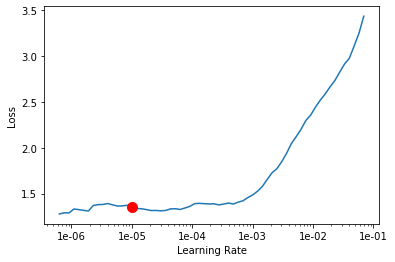

In [26]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [27]:
learn.fit_one_cycle(20, slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,1.380328,1.150244,0.299820,0.700180,0.890485,02:38
1,1.336370,1.102635,0.292639,0.707361,0.886894,02:37
2,1.362030,1.143494,0.308797,0.691203,0.906643,02:39
3,1.250222,1.172243,0.321364,0.678636,0.881508,02:41
4,1.349935,1.235851,0.326750,0.673250,0.881508,02:42
5,1.301058,1.190110,0.310592,0.689408,0.895871,02:38
6,1.259802,1.231618,0.314183,0.685817,0.885099,02:36
7,1.120989,1.037997,0.276481,0.723519,0.906643,02:32
8,1.165657,1.133453,0.287253,0.712747,0.901257,02:31
9,1.135661,1.091372,0.294434,0.705566,0.903052,02:32


In [28]:
learn.save('densenet161-mixup-stg2b')

### Check model performance with confusion matrix.

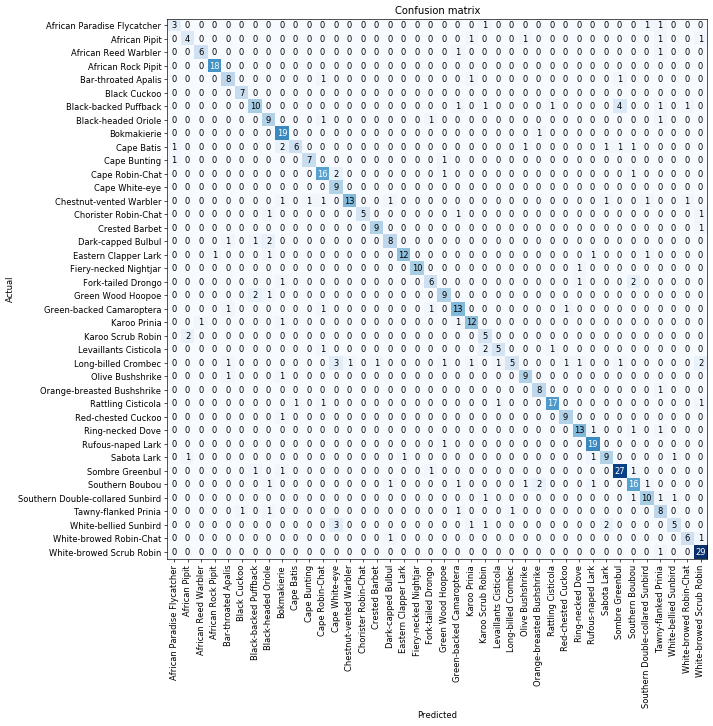

In [29]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

# Making a submission

Save the model's predicted probabilities to a file following the sample submission format. This can be submitted on Zindi.

In [30]:
src = (ImageList.from_folder('../test'))

In [31]:
# Add the test data as a test set for the model
learn.data.add_test(src)

In [32]:
# Get predictions
preds, y = learn.get_preds(DatasetType.Test)

In [33]:
test.head()

,ID,Ring-necked Dove,Black Cuckoo,Red-chested Cuckoo,Fiery-necked Nightjar,Green Wood Hoopoe,Crested Barbet,Cape Batis,Olive Bushshrike,Orange-breasted Bushshrike,...,Cape Robin-Chat,White-browed Robin-Chat,Chorister Robin-Chat,Southern Double-collared Sunbird,White-bellied Sunbird,African Pipit,African Rock Pipit,Cape Bunting,file_name,img_path
0,019OYB,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,test/019OYB.png,../test\019OYB.png
1,01S9OX,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,test/01S9OX.png,../test\01S9OX.png
2,02CS12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,test/02CS12.png,../test\02CS12.png
3,02LM3W,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,test/02LM3W.png,../test\02LM3W.png
4,0C3A2V,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,test/0C3A2V.png,../test\0C3A2V.png


In [34]:
# Add preds to test
test = test.copy()
for b in birds:
  test[b] = preds[:,learn.data.classes.index(b)]
test.head()

,ID,Ring-necked Dove,Black Cuckoo,Red-chested Cuckoo,Fiery-necked Nightjar,Green Wood Hoopoe,Crested Barbet,Cape Batis,Olive Bushshrike,Orange-breasted Bushshrike,...,Cape Robin-Chat,White-browed Robin-Chat,Chorister Robin-Chat,Southern Double-collared Sunbird,White-bellied Sunbird,African Pipit,African Rock Pipit,Cape Bunting,file_name,img_path
0,019OYB,0.000045,0.000063,0.001186,0.994372,0.000018,0.000062,0.000040,0.000207,0.000144,...,0.000003,0.000260,0.000156,0.000081,0.000025,0.000019,0.000035,0.000072,test/019OYB.png,../test\019OYB.png
1,01S9OX,0.000245,0.001441,0.000661,0.000905,0.000086,0.000907,0.002070,0.000466,0.001632,...,0.002460,0.000100,0.000319,0.000007,0.000021,0.000042,0.000445,0.001310,test/01S9OX.png,../test\01S9OX.png
2,02CS12,0.011186,0.001423,0.000257,0.005687,0.027559,0.000531,0.005411,0.014925,0.017992,...,0.003545,0.001061,0.001339,0.003209,0.000425,0.000167,0.002152,0.002563,test/02CS12.png,../test\02CS12.png
3,02LM3W,0.006073,0.000057,0.000868,0.000350,0.000441,0.000529,0.003289,0.953890,0.000404,...,0.000034,0.000047,0.002690,0.000221,0.000195,0.000146,0.000124,0.000218,test/02LM3W.png,../test\02LM3W.png
4,0C3A2V,0.002777,0.000205,0.000312,0.000258,0.004053,0.002598,0.000162,0.001443,0.002486,...,0.118319,0.000723,0.001960,0.004836,0.000261,0.001308,0.001123,0.000609,test/0C3A2V.png,../test\0C3A2V.png


In [35]:
# Merge back into submission DF, adding a low prob prediction for rows where we had no image generated
cols = ['ID']
for b in birds:
  cols.append(b)
ss = pd.merge(sub['ID'], test[cols], on='ID', how='left' )
ss = ss.fillna(1/40) # For those with NaNs (if you only generated spectrograms for a subset of the test mp3s)
ss.head()

,ID,Ring-necked Dove,Black Cuckoo,Red-chested Cuckoo,Fiery-necked Nightjar,Green Wood Hoopoe,Crested Barbet,Cape Batis,Olive Bushshrike,Orange-breasted Bushshrike,...,Karoo Scrub Robin,White-browed Scrub Robin,Cape Robin-Chat,White-browed Robin-Chat,Chorister Robin-Chat,Southern Double-collared Sunbird,White-bellied Sunbird,African Pipit,African Rock Pipit,Cape Bunting
0,019OYB,0.000045,0.000063,0.001186,0.994372,0.000018,0.000062,0.000040,0.000207,0.000144,...,0.000039,0.000934,0.000003,0.000260,0.000156,0.000081,0.000025,0.000019,0.000035,0.000072
1,01S9OX,0.000245,0.001441,0.000661,0.000905,0.000086,0.000907,0.002070,0.000466,0.001632,...,0.000177,0.006053,0.002460,0.000100,0.000319,0.000007,0.000021,0.000042,0.000445,0.001310
2,02CS12,0.011186,0.001423,0.000257,0.005687,0.027559,0.000531,0.005411,0.014925,0.017992,...,0.001243,0.001699,0.003545,0.001061,0.001339,0.003209,0.000425,0.000167,0.002152,0.002563
3,02LM3W,0.006073,0.000057,0.000868,0.000350,0.000441,0.000529,0.003289,0.953890,0.000404,...,0.000125,0.005761,0.000034,0.000047,0.002690,0.000221,0.000195,0.000146,0.000124,0.000218
4,0C3A2V,0.002777,0.000205,0.000312,0.000258,0.004053,0.002598,0.000162,0.001443,0.002486,...,0.002309,0.023117,0.118319,0.000723,0.001960,0.004836,0.000261,0.001308,0.001123,0.000609


In [36]:
# Check shape
ss.shape

(911, 41)

In [ ]:
# Save 
ss.to_csv('./submissions/submission_starter_notebook_densenet161_mixup_096_752_20ep.csv', index=False)